<a href="https://colab.research.google.com/github/AlifaNurHafizhah001/Latihan_Naive-Bayes_Sistem-Cerdas/blob/main/Kelompok_1_Sistem_Cerdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beril Khoiriyatul Hasanah = E42240745
Alifa Nur Hafizhah = E42240667
Maifazul Azizah = E42240182
Lady Yunalesca = E42241245

> Add blockquote



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.drop('Glucose', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
correlation = df.corr()
correlation['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


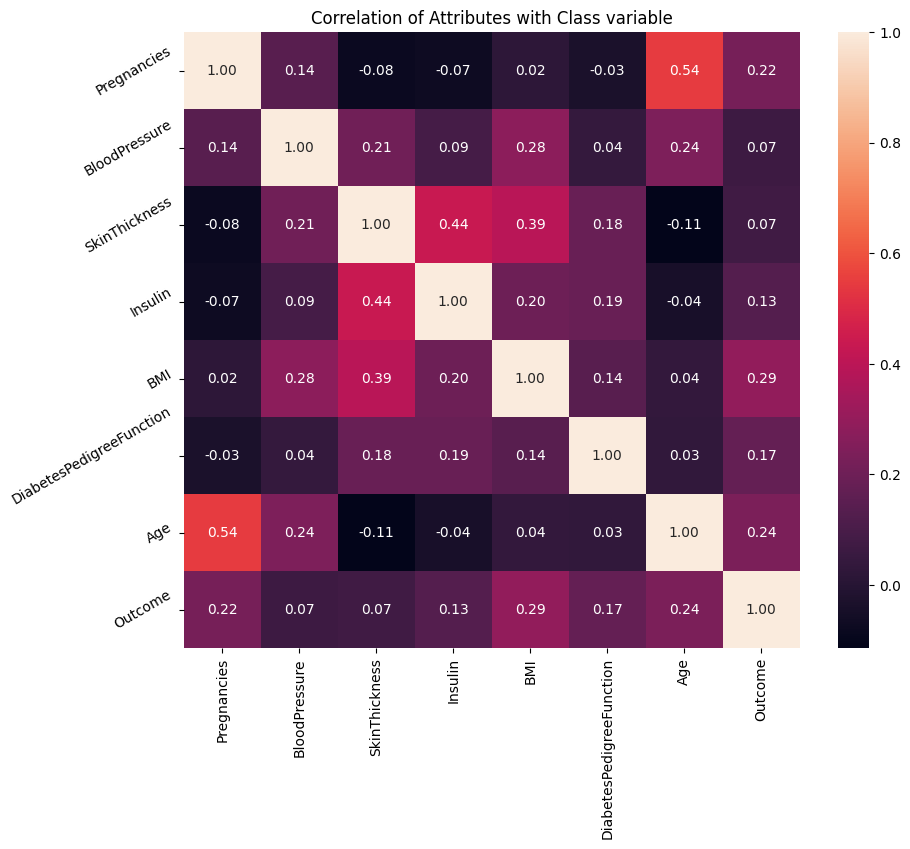

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,1.827813,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1939, random_state = 0)
X_train.shape, X_test.shape

((619, 7), (149, 7))

In [ ]:
X_train

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
476,-0.547919,0.563223,1.534551,0.965543,0.216705,0.722182,-0.360847
482,0.046014,-0.574128,0.091805,-0.267429,-0.532119,-0.500966,-0.445935
230,0.046014,0.873409,-1.288212,-0.692891,1.523973,0.522854,-0.956462
527,-0.250952,0.253036,-0.347291,0.218813,-0.722498,-1.101970,-0.786286
380,-0.844885,0.149641,0.593630,0.019107,-0.151361,1.054395,-0.786286
...,...,...,...,...,...,...,...
763,1.827813,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
192,0.936914,-0.160546,-1.288212,-0.692891,-0.202129,-0.268417,0.234767
629,0.046014,-0.212243,0.091805,-0.692891,-0.925569,-0.978145,-1.041549
559,2.124780,0.253036,-1.288212,-0.692891,-0.240205,-0.519087,0.149679


In [ ]:
X_test

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,-0.844885,0.356432,1.409094,-0.692891,1.384362,2.784923,-0.956462
122,-0.547919,0.253036,0.593630,0.175399,0.204013,-0.204994,-0.871374
113,0.046014,-0.367337,-1.288212,-0.692891,0.254780,-0.244256,-0.701198
14,0.342981,0.149641,-0.096379,0.826616,-0.785957,0.347687,1.511083
529,-1.141852,-0.212243,-1.288212,-0.692891,-0.938260,0.568156,-0.190672
...,...,...,...,...,...,...,...
64,0.936914,-0.160546,-1.288212,-0.692891,0.102477,-0.645932,0.745293
671,-0.844885,-0.574128,-0.660932,-0.692891,-0.836725,0.238963,-1.041549
52,0.342981,-0.160546,0.029077,-0.493184,-0.963644,-0.392242,-0.275760
310,0.639947,-0.160546,0.593630,-0.692891,-0.735190,-0.479825,0.660206


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9,weights='distance',metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7852


In [ ]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7852


In [ ]:
y_test.value_counts()

,count
Outcome,
0,104
1,45


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TP) = ', cm[0,0])
print('\nTrue Positives(TN) = ', cm[1,1])
print('\nFalse Negatives(FP) = ', cm[0,1])
print('\nFalse Positives(FN) = ', cm[1,0])

Confusion matrix

 [[94 10]
 [22 23]]

True Negatives(TP) =  94

True Positives(TN) =  23

False Negatives(FP) =  10

False Positives(FN) =  22


<Axes: >

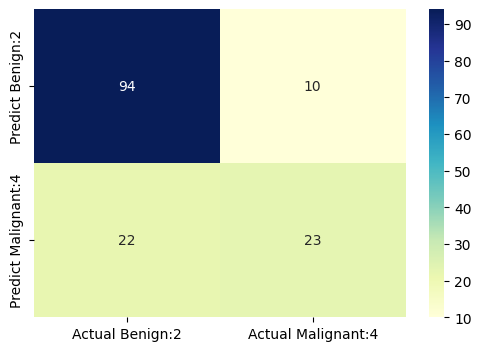

In [ ]:
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(cm, columns=['Actual Benign:2', 'Actual Malignant:4'], index=['Predict Benign:2', 'Predict Malignant:4'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       104
           1       0.70      0.51      0.59        45

    accuracy                           0.79       149
   macro avg       0.75      0.71      0.72       149
weighted avg       0.78      0.79      0.77       149



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.64935065 0.72727273 0.66233766 0.68831169 0.7012987  0.67532468
 0.71428571 0.77922078 0.68421053 0.68421053]


In [ ]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.70
